# Chronic Kidney Disease Classification Project

# Team Members:
## ----------------------------
## 1. Mostafa Hamdy Abo El-Ela
## 2. Nada Mohamed Salah
## 3. Nourhan Atef Mohamed
## 4. Yousef Ragab Abd El-Motaleb
## ------------------------------------------------------------

# Reading Dataset

In [1]:
import pandas as pd

# read data and using na_values to replace all "?" with NaN
data = pd.read_csv('chronic-kidney-disease.csv',na_values=['?'])
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,1,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,2,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,3,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,4,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


# Clean Data (Handling missing values)

In [2]:
#knowing the data type of each column
data.dtypes

id         int64
age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

In [3]:
#getting the null values and store it in variable called "mask"
mask = data.isnull()
mask

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

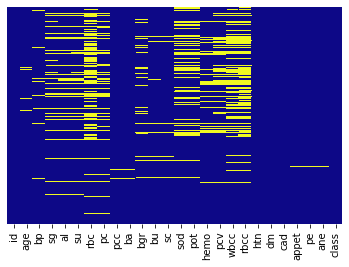

In [11]:
#creating heatmap for data to make sure if there are missing values
#importing data visualization library which called "seaborn" to create heatmap
import seaborn as sns

#cbar means colorbar, we don't need colorbar so it = false,
#cmap means colormap, there are many color, so we choose "plasma" 
sns.heatmap(mask , xticklabels=True , yticklabels=False , cbar=False , cmap='plasma')

In [12]:
#knowing columns which have missing values
col_mask = data.isnull().any(axis=0)
col_mask

id       False
age       True
bp        True
sg        True
al        True
su        True
rbc       True
pc        True
pcc       True
ba        True
bgr       True
bu        True
sc        True
sod       True
pot       True
hemo      True
pcv       True
wbcc      True
rbcc      True
htn       True
dm        True
cad       True
appet     True
pe        True
ane       True
class    False
dtype: bool

In [13]:
#knowing rows which have missing values
row_mask = data.isnull().any(axis=1)
row_mask

0       True
1       True
2       True
3      False
4       True
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [14]:
#for rows:
#getting the percentage of missing values for all rows by diving the sum of missing values by length of all data.
num_of_rows_with_nan = row_mask.sum()
num_of_total_rows = len(data)

print(num_of_rows_with_nan / num_of_total_rows)

0.605


In [15]:
#for columns:
#getting the percentage of missing values for each column by diving the sum of missing values by length of all data.
data.isnull().sum() / len(data)

id       0.0000
age      0.0225
bp       0.0300
sg       0.1175
al       0.1150
su       0.1225
rbc      0.3800
pc       0.1625
pcc      0.0100
ba       0.0100
bgr      0.1100
bu       0.0475
sc       0.0425
sod      0.2175
pot      0.2200
hemo     0.1300
pcv      0.1775
wbcc     0.2650
rbcc     0.3275
htn      0.0050
dm       0.0050
cad      0.0050
appet    0.0025
pe       0.0025
ane      0.0025
class    0.0000
dtype: float64

In [16]:
#create empty array to store Categorical names in it
#but how? by its data type, which is "object"
cat_col_names = [ ]
for col in data.columns:
    if data[col].dtype=='object':
        cat_col_names.append(col)

#now we get all Categorical in variable called "cat_data"
cat_data = data[cat_col_names]

In [17]:
#getting the mode of each Categorical (most frequent value)
modes = cat_data.mode()
print(modes)

      rbc      pc         pcc          ba htn  dm cad appet  pe ane class
0  normal  normal  notpresent  notpresent  no  no  no  good  no  no   ckd


In [18]:
print(type(modes))

<class 'pandas.core.frame.DataFrame'>


In [19]:
#from the pervious line, we know the datatype of modes is "DataFrame",so we need to:
#transform it from dataframe to series using squeeze function (also it can be done using iloc[0])
modes_series = modes.squeeze()

In [20]:
#filling Categorical data (which contain missing values)  with mode (most frequent value)
data_clean = data.fillna(modes_series)
data_clean.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,1,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,2,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,3,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,4,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [21]:
#filling numerical data (which contain missing values)  with 0.0 (may be using average"mean" or median, but all same reslut)
data_clean2 = data_clean.fillna(0.0)
data_clean2.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,1,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,2,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38.0,6000.0,0.0,no,no,no,good,no,no,ckd
2,3,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,0.0,no,yes,no,poor,no,yes,ckd
3,4,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


<AxesSubplot:>

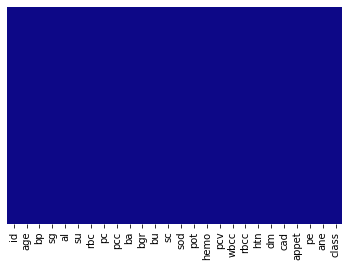

In [22]:
#now, create heatmap to make sure if missing values is cleaned or not
sns.heatmap(data_clean2.isnull(), xticklabels=True , yticklabels=False , cbar=False , cmap='plasma')

# Input and Output

In [23]:
#filtering the data to data_input by drop id and class
data_input =data_clean2.drop(columns=['id','class']) 
data_input.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,0.0,...,11.3,38.0,6000.0,0.0,no,no,no,good,no,no
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,9.6,31.0,7500.0,0.0,no,yes,no,poor,no,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,11.6,35.0,7300.0,4.6,no,no,no,good,no,no


In [24]:
#create data_output
data_output =data_clean2['class']
data_output.head()

0    ckd
1    ckd
2    ckd
3    ckd
4    ckd
Name: class, dtype: object

# Data Details:
#### 01. age          (numerical) --> Age in years
#### 02. bp           (numerical) -->  Blood Pressure  in mm/Hg
#### 03. sg           (nominal) --> Specific Gravity - (1.005,1.010,1.015,1.020,1.025)
#### 04. al            (nominal) --> Albumin - (0,1,2,3,4,5)
#### 05. su           (nominal) --> Sugar - (0,1,2,3,4,5)
#### 06. rbc          (nominal) --> Red Blood Cells - (normal,abnormal)
#### 07. pc           (nominal) --> Pus Cell - (normal,abnormal)
#### 08. pcc         (nominal) --> Pus Cell clumps - (present,notpresent)
#### 09. ba           (nominal) --> Bacteria - (present,notpresent)
#### 10. bgr         (numerical) --> Blood Glucose Random in mgs/dl
#### 11. bu          (numerical) --> Blood Urea in mgs/dl
#### 12. sc          (numerical) --> Serum Creatinine in mgs/dl
#### 13. sod        (numerical) --> Sodium in mEq/L
#### 14. pot         (numerical) -->  Potassium in mEq/L
#### 15. hemo     (numerical) --> Haemoglobin in gms
#### 16. pcv        (numerical) --> Packed Cell Volume
#### 17. wc         (numerical) --> White Blood Cell Count in cells/cumm
#### 18. rc          (numerical) --> Red Blood Cell Count in millions/cmm
#### 19. htn        (nominal) --> Hypertension - (yes,no)
#### 20. dm        (nominal) --> Diabetes Mellitus - (yes,no)
#### 21. cad       (nominal) --> Coronary Artery Disease - (yes,no)
#### 22. appet   (nominal) --> Appetite - (good,poor)
#### 23. pe        (nominal) --> Pedal Edema - (yes,no)
#### 24. ane      (nominal) --> Anemia - (yes,no)
#### 25. class   (nominal) --> Classification - (ckd,notckd) 

## Number of Attributes: 24 (input) + 1(output) = 25 ( 11  numeric ,14  nominal)

# Handling Categorical Data (Input Data)

In [25]:
#getting unique values of each column by using unique() function.
print('rbc: ------->', data_input['rbc'].unique())
print('pc: -------->', data_input['pc'].unique())
print('pcc: ------->', data_input['pcc'].unique())
print('ba: -------->', data_input['ba'].unique())
print('htn: ------->', data_input['htn'].unique())
print('dm: -------->', data_input['dm'].unique())
print('cad: ------->', data_input['cad'].unique())
print('appet: ----->', data_input['appet'].unique())
print('pe : ------->', data_input['pe'].unique())
print('ane: ------->', data_input['ane'].unique())

rbc: -------> ['normal' 'abnormal']
pc: --------> ['normal' 'abnormal']
pcc: -------> ['notpresent' 'present']
ba: --------> ['notpresent' 'present']
htn: -------> ['yes' 'no']
dm: --------> ['yes' 'no']
cad: -------> ['no' 'yes']
appet: -----> ['good' 'poor']
pe : -------> ['no' 'yes']
ane: -------> ['no' 'yes']


In [26]:
#create binary encoding for each column
data_input_encoded = data_input.replace({ 
    'rbc': {'normal': 0, 'abnormal': 1}, 
    'pc': {'normal': 0, 'abnormal': 1},
    'pcc': {'notpresent': 0, 'present': 1}, 
    'ba': {'notpresent': 0, 'present': 1}, 
    'htn': {'yes': 0, 'no': 1},
    'dm': {'yes': 0, 'no': 1},
    'cad': {'no': 0, 'yes': 1},
    'appet': {'good': 0, 'poor': 1},
    'pe': {'no': 0, 'yes': 1},
    'ane': {'no': 0, 'yes': 1},
})

In [27]:
#showing the data type of encoded data to make sure that input_data is encoded or not
data_input_encoded.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc        int64
pc         int64
pcc        int64
ba         int64
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn        int64
dm         int64
cad        int64
appet      int64
pe         int64
ane        int64
dtype: object

In [28]:
data_input_encoded.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,121.0,...,15.4,44.0,7800.0,5.2,0,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,0,0,0,0.0,...,11.3,38.0,6000.0,0.0,1,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,423.0,...,9.6,31.0,7500.0,0.0,1,0,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,...,11.2,32.0,6700.0,3.9,0,1,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,106.0,...,11.6,35.0,7300.0,4.6,1,1,0,0,0,0


# Handling Categorical Data (Output Data)

In [29]:
#getting unique values for output column
data_output.unique()

array(['ckd', 'notckd'], dtype=object)

In [30]:
#creating binary encoding
data_output = data_output.replace({'ckd':0,'notckd':1})

In [31]:
#making sure if the output_data is encoded or not
data_output.unique()

array([0, 1], dtype=int64)

# Model Selection (Spliting Data into: Train - Validation - Test)

In [36]:
from sklearn.model_selection import train_test_split

#spliting the input_data to x(later, for train and validation) and x_test
#spliting the output_data to y(later, for train and validation) and y_test
x, x_test, y, y_test = train_test_split(data_input_encoded, data_output, test_size=0.25, random_state=0)

#spliting the x to x_train and x_val (validation)
#spliting the y to y_train and y_val (validation)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.25, random_state=0)

In [39]:
#getting the number of data (row,column) in train,val and test, by using shape.
print('Train Data Size:')
print(x_train.shape)
print(y_train.shape)
print('------------------------')
print('Validation Data Size:')
print(x_val.shape)
print(y_val.shape)
print('------------------------')
print('Test Data Size:')
print(x_test.shape)
print(y_test.shape)

Train Data Size:
(225, 24)
(225,)
------------------------
Validation Data Size:
(75, 24)
(75,)
------------------------
Test Data Size:
(100, 24)
(100,)


# Feature Scaling

In [40]:
#StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance.
#MinMaxScaler scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values.

#StandardScaler is better for us
from sklearn.preprocessing import StandardScaler

#create object of StandardScaler called "scaler" and then fit using the train data (getting mean and standard deviation)
scaler = StandardScaler()
scaler.fit(x_train)

#scalling x data (means input data) for train, val, and test
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

# Helper Function: Evaluate Classifier

In [41]:
#Calculate and return training accuracy and validation accuracy of given classifier on given training and validation data
from sklearn.metrics import accuracy_score

#the parameters are: clf(classifier), input and output train data , input and output val data
def eval_classifier(clf, x_train, y_train, x_val, y_val):
    clf.fit(x_train, y_train)
    y_pred_train = clf.predict(x_train)
    y_pred_val = clf.predict(x_val)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)
    print(clf.__class__.__name__)
    print('Training Accuracy:   ', acc_train)
    print('Validation Accuracy: ', acc_val)
    print('----------------------------')
    return acc_train, acc_val

# Classification (Using Some Classifier)

### 1. Support Vector Machine (SVM) Classifier
### 2. Decision Tree Classifier
### 3. Logistic Regression Classifier
### 4. Random Forest Classifier
### 5. Voting Classifier

In [42]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [52]:
#creating object from each classifier
#for each classifier, we choose the best parameters based on the best accuracy for both training and validation
svc_clf = SVC(random_state=1 , C=0.2) 
tree_clf = DecisionTreeClassifier(max_depth=1 , random_state=1)
logistic_clf = LogisticRegression(random_state=1 , C=0.1)
rf_clf = RandomForestClassifier(n_estimators=500 , max_depth=3 , random_state=1)

#create estimator (list) to save the classifiers and parse it the votingClassifier as parameter
estimators = [
    ('SVC', svc_clf),
    ('Decision Tree', tree_clf),
    ('Logistic Regression', logistic_clf),
    ('Random Forest', rf_clf),
]

#creating voting classifier ()
#there are two types of voting: 1- hard (default) -> using the majority, 2- soft -> using the probability
voting_clf = VotingClassifier(estimators) #hard

In [55]:
#creating new list containg the old list (estimators) plus the list of votingClassifier
all_estimators = estimators + [('Voting Classifier', voting_clf)]

#creating dictionary to store the results that resulted from for loop
results = {
    'Model': [],
    'Training Accuracy': [],
    'Validation Accuracy': []
}
#creating for loop to get each classifier by using the eval_classifier to return the accuracy of train and val.
for (name, clf) in all_estimators:
    acc_train, acc_val = eval_classifier(clf, x_train_scaled, y_train, x_val_scaled, y_val)
    results['Model'].append(name)
    results['Training Accuracy'].append(acc_train)
    results['Validation Accuracy'].append(acc_val)

SVC
Training Accuracy:    0.96
Validation Accuracy:  0.9733333333333334
----------------------------
DecisionTreeClassifier
Training Accuracy:    0.92
Validation Accuracy:  0.9333333333333333
----------------------------
LogisticRegression
Training Accuracy:    0.9688888888888889
Validation Accuracy:  0.9733333333333334
----------------------------
RandomForestClassifier
Training Accuracy:    0.9866666666666667
Validation Accuracy:  0.9866666666666667
----------------------------
VotingClassifier
Training Accuracy:    0.9777777777777777
Validation Accuracy:  0.9866666666666667
----------------------------


In [56]:
#creating dataframe (table) for the results
results_df = pd.DataFrame(results)

#using sort_values to sort data to dataframe, the parameters, by="name of column which sorted according it"
#the default is sort ascending (small to large), but we need descending, so put it equal false.
results_df.sort_values(by='Validation Accuracy', ascending=False, ignore_index=True, inplace = True)

In [57]:
results_df

,Model,Training Accuracy,Validation Accuracy
0,Random Forest,0.986667,0.986667
1,Voting Classifier,0.977778,0.986667
2,SVC,0.960000,0.973333
3,Logistic Regression,0.968889,0.973333
4,Decision Tree,0.920000,0.933333


In [58]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

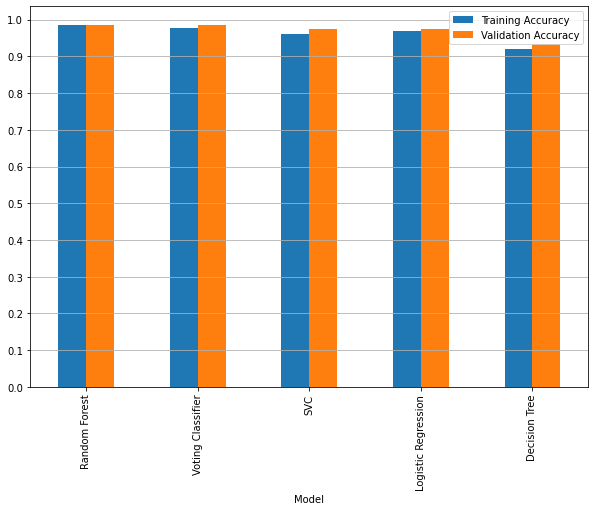

In [59]:
#creating plot for the results
results_df.plot.bar(x='Model',y=['Training Accuracy','Validation Accuracy'],figsize=(10,7))

#edit the y range to start with 0 and with 1.0 by step 0.1 
plt.yticks(np.arange(0, 1.1, 0.1))

#add lines using grid function and y means horizontally
plt.grid(axis='y')
plt.show()

### Hint: Best Model is Random Forest Classifier

# Testing Random Forest Classifier

In [60]:
#predict the output by using x_test_scaled, then calculate the accuracy
y_pred_test = rf_clf.predict(x_test_scaled)
print(accuracy_score(y_test, y_pred_test))

1.0


# Evalution Metrics
## Confusion Matrix

In [61]:
from sklearn.metrics import confusion_matrix 

print(confusion_matrix(y_test, y_pred_test))

[[62  0]
 [ 0 38]]


## Classification Report

In [66]:
#creating classification report to get precision, recall, f1-score, and support
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        38

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



## Correlation Coefficient 

In [67]:
#is a statistical measure of the strength of the relationship between the relative movements of two variables. 
#The values range between -1.0 and 1.0.

#transform x_test_scaled from numpy array to dataframe
x_test_df = pd.DataFrame(x_test_scaled, index=x_test.index, columns=x_test.columns)

In [68]:
x_test_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
132,0.051334,-3.581203,-2.549228,-0.673268,-0.376202,-0.345547,-0.472045,-0.320844,-0.204124,1.063865,...,-0.374667,-0.402831,1.522148,-0.153910,-1.333333,0.771845,-0.303699,-0.555103,2.057318,2.501612
309,0.101553,-0.598708,0.398636,-0.673268,-0.376202,-0.345547,-0.472045,-0.320844,-0.204124,0.002882,...,1.237476,0.514431,0.425066,1.186060,0.750000,0.771845,-0.303699,-0.555103,-0.486070,-0.399742
341,0.704174,-0.101626,0.413086,-0.673268,-0.376202,-0.345547,-0.472045,-0.320844,-0.204124,0.014670,...,0.525134,0.571760,0.252974,0.683571,0.750000,0.771845,-0.303699,-0.555103,-0.486070,-0.399742
196,0.001116,1.389622,0.369735,1.731259,-0.376202,2.893959,2.118444,-0.320844,-0.204124,0.002882,...,-0.468396,-0.402831,0.747737,0.181082,-1.333333,-1.295597,-0.303699,1.801467,2.057318,2.501612
246,-0.049102,1.886704,0.384186,1.731259,-0.376202,2.893959,-0.472045,3.116775,-0.204124,-0.268258,...,-0.374667,-0.288173,-0.241788,-0.237659,-1.333333,0.771845,3.292735,-0.555103,-0.486070,2.501612


In [69]:
print(type(y_test))

<class 'pandas.core.series.Series'>


In [70]:
#concatenate x_test_df and y_test using concat() function from padnas library.
test_data = pd.concat([x_test_df, y_test], axis=1)

In [71]:
test_data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
132,0.051334,-3.581203,-2.549228,-0.673268,-0.376202,-0.345547,-0.472045,-0.320844,-0.204124,1.063865,...,-0.402831,1.522148,-0.153910,-1.333333,0.771845,-0.303699,-0.555103,2.057318,2.501612,0
309,0.101553,-0.598708,0.398636,-0.673268,-0.376202,-0.345547,-0.472045,-0.320844,-0.204124,0.002882,...,0.514431,0.425066,1.186060,0.750000,0.771845,-0.303699,-0.555103,-0.486070,-0.399742,1
341,0.704174,-0.101626,0.413086,-0.673268,-0.376202,-0.345547,-0.472045,-0.320844,-0.204124,0.014670,...,0.571760,0.252974,0.683571,0.750000,0.771845,-0.303699,-0.555103,-0.486070,-0.399742,1
196,0.001116,1.389622,0.369735,1.731259,-0.376202,2.893959,2.118444,-0.320844,-0.204124,0.002882,...,-0.402831,0.747737,0.181082,-1.333333,-1.295597,-0.303699,1.801467,2.057318,2.501612,0
246,-0.049102,1.886704,0.384186,1.731259,-0.376202,2.893959,-0.472045,3.116775,-0.204124,-0.268258,...,-0.288173,-0.241788,-0.237659,-1.333333,0.771845,3.292735,-0.555103,-0.486070,2.501612,0


In [72]:
print(test_data.corr())

            age        bp        sg        al        su       rbc        pc  \
age    1.000000  0.171403  0.025940 -0.104125  0.159693 -0.136817 -0.001441   
bp     0.171403  1.000000  0.065189  0.127994 -0.026733  0.218921  0.051751   
sg     0.025940  0.065189  1.000000  0.231370  0.120290  0.124895  0.151375   
al    -0.104125  0.127994  0.231370  1.000000  0.239624  0.544578  0.583712   
su     0.159693 -0.026733  0.120290  0.239624  1.000000  0.083745  0.147467   
rbc   -0.136817  0.218921  0.124895  0.544578  0.083745  1.000000  0.350070   
pc    -0.001441  0.051751  0.151375  0.583712  0.147467  0.350070  1.000000   
pcc    0.156456  0.098568  0.112961  0.409458  0.179502  0.017236  0.353888   
ba    -0.082282  0.160083  0.093500  0.496152  0.131399  0.357187  0.279543   
bgr    0.157821 -0.181046  0.098377  0.154220  0.661522  0.036308  0.193191   
bu     0.100150  0.062046 -0.241392  0.450090  0.028525  0.342970  0.386197   
sc     0.065869  0.082040 -0.153971  0.303261  0.035

<AxesSubplot:>

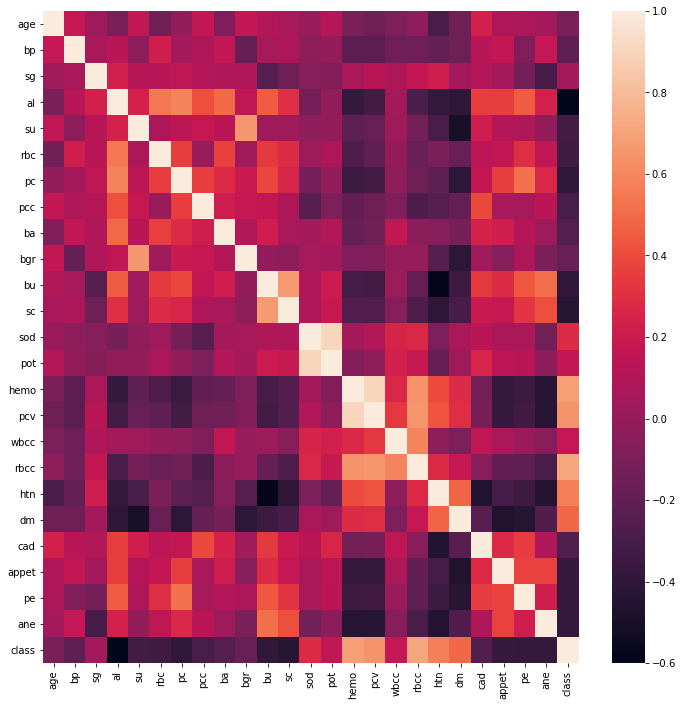

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#creating correction using corr() function for test_data (in which we concatenate x_test_df and y_test)
corr = test_data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

# Feature Importances

In [74]:
#as we see in pervious heatmap, not all features are important.

#first: getting all features in array called feature_names
feature_names = [
    'age',
    'bp',
    'sg',
    'al',
    'su',
    'rbc',
    'pc',
    'pcc',
    'ba',
    'bgr',
    'bu',
    'sc',
    'sod',
    'pot',
    'hemo',
    'pcv',
    'wc',
    'rc',
    'htn',
    'dm',
    'cad',
    'appet',
    'pe',
    'ane',
]

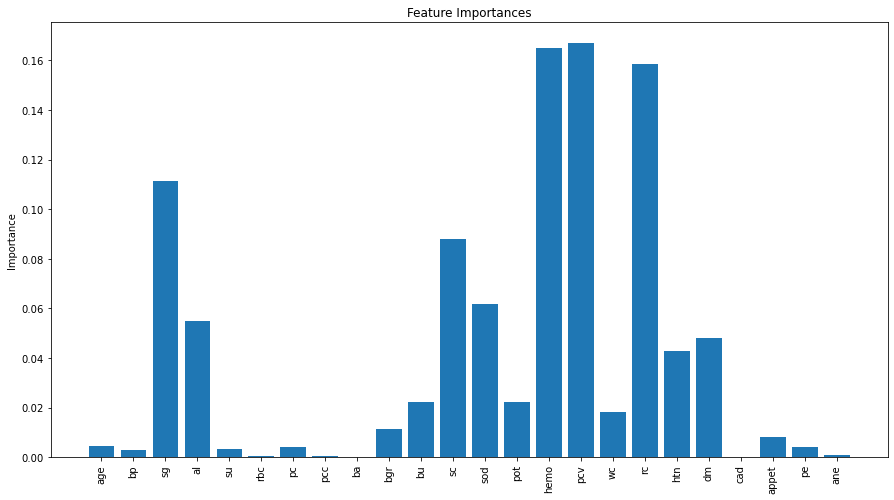

In [75]:
#So, we can use the array (model_name.feature_importances_) to know the degree of importance of each feature.
plt.figure(figsize=(15,8))
plt.bar(feature_names, rf_clf.feature_importances_)

plt.xticks(rotation=90) # this line means rotate the x label 90 degree to appear vertically 
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

# saving the model and scaler

In [77]:
import pickle
with open('saved-model.pickle', 'wb') as f:
    pickle.dump(rf_clf, f)
    
with open('saved-scaler.pickle', 'wb') as f:
    pickle.dump(scaler, f)